In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
import datetime

In [2]:
best_boroughs = [
    'Kingston upon Thames', 'Bexley', 'Sutton',
    'Westminster', 'Kensington and Chelsea'
]
worst_boroughs = [
    'Hackney', 'Lewisham', 'Haringey', 'Islington', 'Lambeth'
]

# Crime Rate

In [3]:
df_crime_grouped = pd.read_csv('presentation_dataframes/average_crime_rate.csv')
df_crime_grouped['date'] = pd.to_datetime(df_crime_grouped['date'])

df_crime_grouped


,Crime type,date,crime_rate_per_1000_with_tourism,borough
0,Anti-social behaviour,2016-01-01,2.050156,Most trusting Boroughs
1,Anti-social behaviour,2016-02-01,1.950408,Most trusting Boroughs
2,Anti-social behaviour,2016-03-01,2.165397,Most trusting Boroughs
3,Anti-social behaviour,2016-04-01,2.170674,Most trusting Boroughs
4,Anti-social behaviour,2016-05-01,2.562290,Most trusting Boroughs
...,...,...,...,...
2711,Violence and sexual offences,2023-09-01,2.823669,Least trusting Boroughs
2712,Violence and sexual offences,2023-10-01,2.743923,Least trusting Boroughs
2713,Violence and sexual offences,2023-11-01,2.755954,Least trusting Boroughs
2714,Violence and sexual offences,2023-12-01,2.789333,Least trusting Boroughs


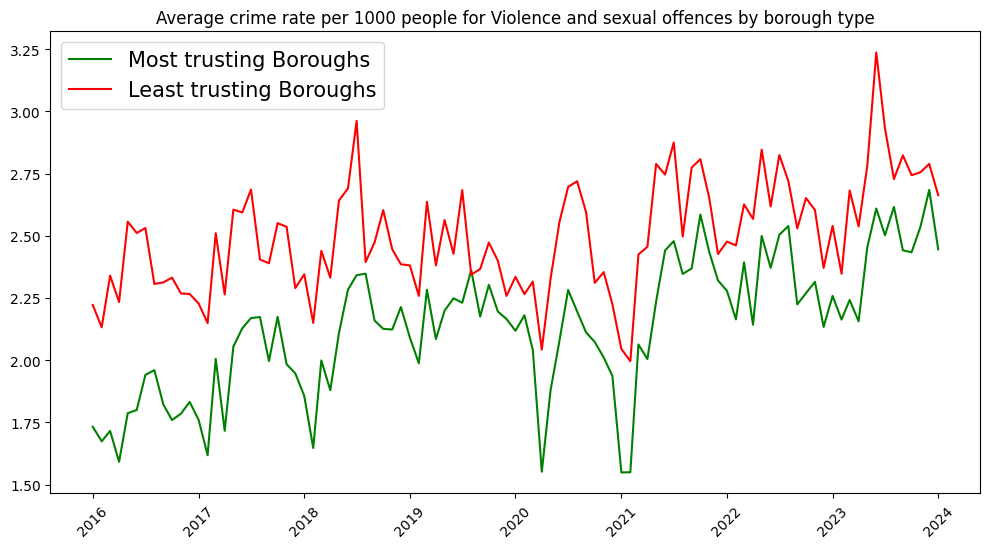

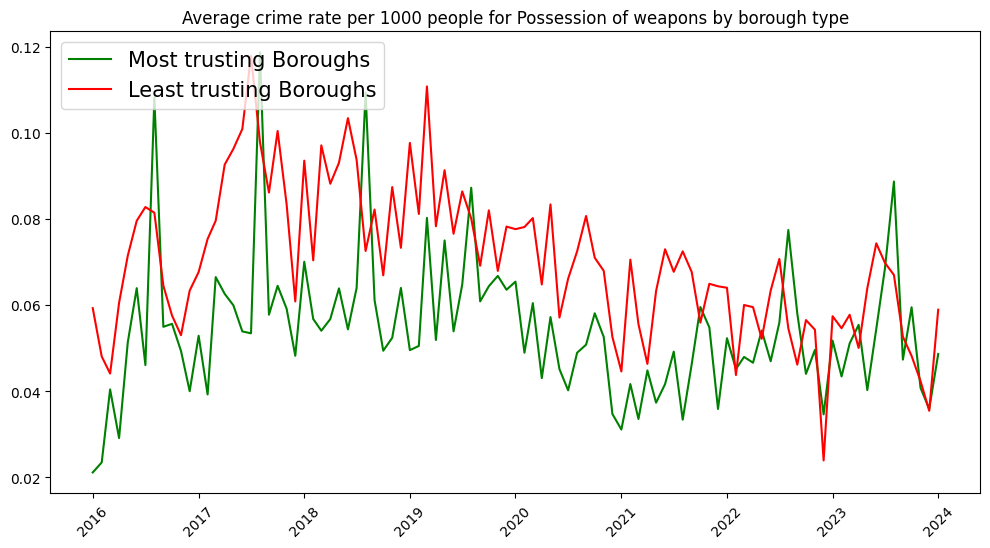

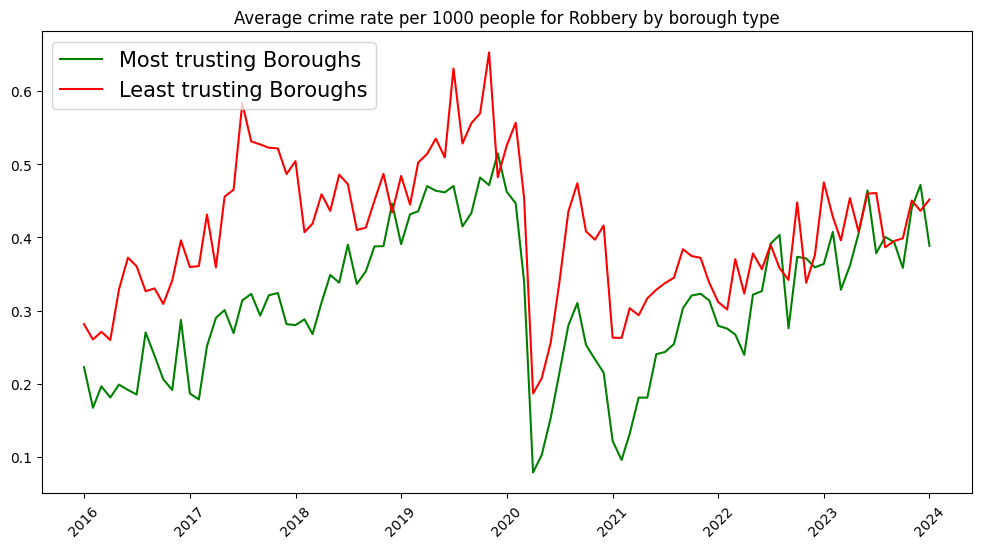

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plots_to_make = ['Violence and sexual offences', 'Possession of weapons', 'Robbery']
color_mapping = {'Most trusting Boroughs': 'green', 'Least trusting Boroughs': 'red'}

for crime in plots_to_make:
    fig, ax = plt.subplots(figsize=(12, 6))
    df_crime = df_crime_grouped[df_crime_grouped['Crime type'] == crime]
    for borough in df_crime['borough'].unique():
        df_borough = df_crime[df_crime['borough'] == borough]
        ax.plot(df_borough['date'], df_borough['crime_rate_per_1000_with_tourism'], label=borough, color=color_mapping[borough])

    ax.set_title(f'Average crime rate per 1000 people for {crime} by borough type')
    ax.legend(loc='upper left', prop={'size': 15})

    ax.tick_params(axis='x', rotation=45)

    plt.savefig(f'presentation_plots/{crime}_by_borough_type.png')
    plt.show()

In [5]:
df_homicide_combined = pd.read_csv('presentation_dataframes\homicide_combined.csv')
df_homicide_combined['Date'] = "01-01-" + df_homicide_combined['Year'].astype(str)
df_homicide_combined['Date'] = pd.to_datetime(df_homicide_combined['Date'], format='%d-%m-%Y')
df_homicide_combined.head()

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\G2MIC\AppData\Local\Temp\ipykernel_9656\2926684961.py:1: SyntaxWarning: invalid escape sequence '\h'
  df_homicide_combined = pd.read_csv('presentation_dataframes\homicide_combined.csv')


,Year,Borough,Count,Date
0,2003,Most trusting Boroughs,13,2003-01-01
1,2004,Most trusting Boroughs,18,2004-01-01
2,2005,Most trusting Boroughs,16,2005-01-01
3,2006,Most trusting Boroughs,13,2006-01-01
4,2007,Most trusting Boroughs,10,2007-01-01


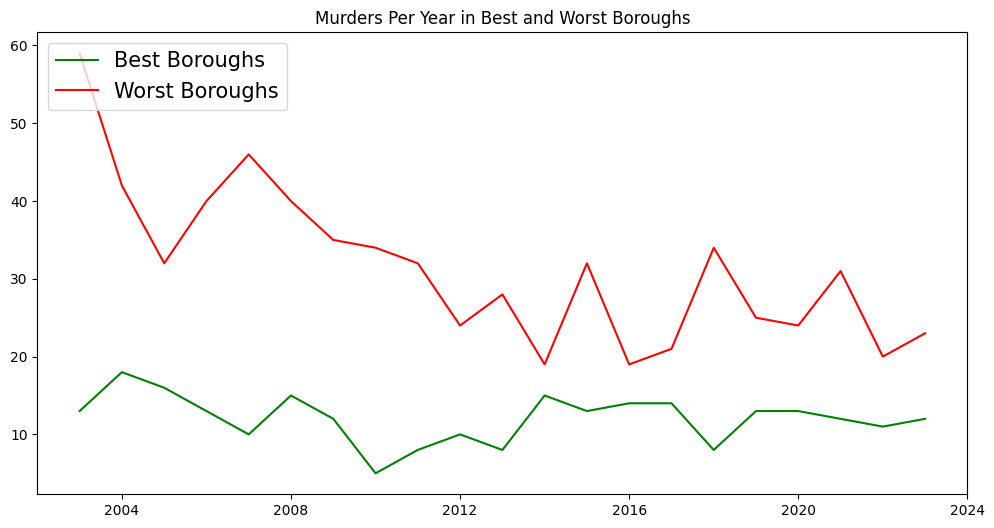

In [6]:
# Plot the combined data
fig = plt.figure(figsize=(12, 6))
plt.plot(df_homicide_combined[df_homicide_combined['Borough'] == 'Most trusting Boroughs']['Date'],
         df_homicide_combined[df_homicide_combined['Borough'] == 'Most trusting Boroughs']['Count'],
         label='Best Boroughs', color='green')
plt.plot(df_homicide_combined[df_homicide_combined['Borough'] == 'Least trusting Boroughs']['Date'],
            df_homicide_combined[df_homicide_combined['Borough'] == 'Least trusting Boroughs']['Count'],
            label='Worst Boroughs', color='red')
plt.title('Murders Per Year in Best and Worst Boroughs')
plt.legend(loc='upper left', prop={'size': 15})
plt.savefig(f'presentation_plots/murders_per_year.png')
plt.show()

# Tabel for slides

In [7]:
df_teen_sas = pd.read_csv('presentation_dataframes/age_sas.csv')
df_teen_sas

,Unnamed: 0,Object of Search,Percentage,Group
0,0,Anything to threaten or harm anyone,5.084617,Best Boroughs
1,1,Articles for use in criminal damage,10.504749,Best Boroughs
2,2,Controlled drugs,44.553147,Best Boroughs
3,3,Evidence of offences under the Act,6.632219,Best Boroughs
4,4,Firearms,0.456886,Best Boroughs
5,5,Fireworks,1.715432,Best Boroughs
6,6,Offensive weapons,18.323387,Best Boroughs
7,7,Stolen goods,12.729563,Best Boroughs
8,0,Anything to threaten or harm anyone,2.556253,Worst Boroughs
9,1,Articles for use in criminal damage,13.506758,Worst Boroughs


In [8]:
sum_best_age = 30866
sum_worst_age = 45378

In [9]:
df_sas_oos = pd.read_csv('presentation_dataframes/sas_oos.csv')
df_sas_oos

,Object of Search,Percentage,Group
0,Anything to threaten or harm anyone,3.298415,Best Boroughs
1,Articles for use in criminal damage,6.893687,Best Boroughs
2,Controlled drugs,61.083304,Best Boroughs
3,Evidence of offences under the Act,5.404202,Best Boroughs
4,Firearms,0.536674,Best Boroughs
5,Fireworks,0.529830,Best Boroughs
6,Offensive weapons,10.856846,Best Boroughs
7,Stolen goods,11.397042,Best Boroughs
8,Anything to threaten or harm anyone,1.945229,Worst Boroughs
9,Articles for use in criminal damage,7.688434,Worst Boroughs


In [10]:
sum_best = 193197
sum_worst = 256905

In [11]:
df_homicide_mok = pd.read_csv('presentation_dataframes/homicide_method_of_killing.csv')
df_homicide_mok

,Method of Killing,Percentage,Group
0,Blunt Implement,7.157149,Best Boroughs
1,Knife or Sharp Implement,43.833044,Best Boroughs
2,Not known/Not Recorded,11.751504,Best Boroughs
3,Other Methods of Killing,19.342317,Best Boroughs
4,"Physical Assault, no weapon",10.254866,Best Boroughs
5,Shooting,9.576401,Best Boroughs
6,Blunt Implement,7.506156,Worst Boroughs
7,Knife or Sharp Implement,54.829043,Worst Boroughs
8,Not known/Not Recorded,4.211453,Worst Boroughs
9,Other Methods of Killing,11.810695,Worst Boroughs


# Statistical testing

In [13]:
# load the numpy arrays
X_train = np.load('presentation_dataframes/X_train_Crime_reg.npy')
X_test = np.load('presentation_dataframes/X_test_Crime_reg.npy')
y_train = np.load('presentation_dataframes/y_train_Crime_reg.npy')
y_test = np.load('presentation_dataframes/y_test_Crime_reg.npy')

In [14]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     12.63
Date:                Tue, 18 Jun 2024   Prob (F-statistic):           4.11e-37
Time:                        11:10:07   Log-Likelihood:                 381.29
No. Observations:                 248   AIC:                            -680.6
Df Residuals:                     207   BIC:                            -536.5
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8944      0.019     48.340      0.0

In [15]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
f_statistic = model.fvalue
f_pvalue = model.f_pvalue

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"F-Statistic: {f_statistic}")
print(f"F-Statistic P-Value: {f_pvalue}")

Mean Squared Error: 0.003466450055200961
R^2 Score: 0.5675389210020578
F-Statistic: 12.627677318301242
F-Statistic P-Value: 4.112180728429519e-37


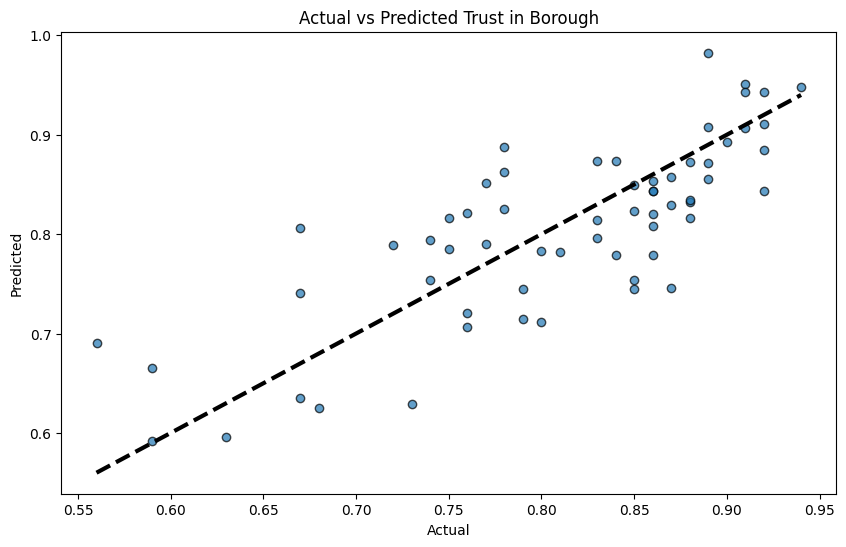

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Trust in Borough')
plt.show()